1_Read dataset
2_Encoding
3_Normalization
4_Train_test_split
5_Train_model


In [1]:
import pandas as pd

from Projects.Functions.Config_Loader.config_loader import *
from Projects.Functions.Features_Engineering.features_engineering import *
from Projects.Functions.Modelisation.modelisation import *
from Projects.Functions.Models_generation.models_generation import *
from Projects.Functions.Report.report import *
from Projects.Functions.Pipeline_Modelisation.pipeline_modelisation import *
from scipy.stats import iqr, shapiro,kstest

In [2]:
config=ConfigLoader(r"C:\Users\tallar\Documents\PROJETS\EDA_and_ML\Projects\Configs\Config.json")

In [3]:
dataset=config.get_dataset_path()
print(f"dataset_path : {dataset}")
cible=config.get_project_target()
print(f"cible : {cible}")
modele_type=config.get_model_type()
print(f"model_type : {modele_type}")
test_fraction=config.get_test_fraction()
print(f"test_fraction : {test_fraction}")
model_path=config.get_model_path()
print(f"model_path : {model_path}")
alpha = config.get_alpha()
print(f"alpha : {alpha}")
correlation_limit = config.get_corr_limit()
print(f"correlation_limit : {correlation_limit}")
cross_validation =config.get_cross_validation()
print(f"cross_validation : {cross_validation}")
file_name =config.get_dataset_filename()
print(f"file_name : {file_name}")
columns_to_delete = config.get_deleted_columns()
print(f"columns_to_delete : {columns_to_delete}")
features_path = config.get_features_json_path()
print(f"features_path : {features_path}")
figure_path = config.get_figure_path()
print(f"figure_path : {figure_path}")
model_api_path=config.get_model_api_path()
print(f"model_api_path : {model_api_path}")
k_fold = config.get_fold_count()
print(f"k_fold : {k_fold}")
pca_dim = config.get_pca_dim()
print(f"pca_dim : {pca_dim}")
pca_variance = config.get_pca_variance()
print(f"pca_variance : {pca_variance}")

dataset_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/car_insurance.csv
cible : outcome
model_type : classification
test_fraction : 0.2
model_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/
alpha : 0.05
correlation_limit : 0.4
cross_validation : False
file_name : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/car_insurance.csv
columns_to_delete : ['SEQN', 'RIDAGEYR', 'id', 'No', 'Id', 'Column1', 'PassengerId', 'Name', 'Ticket', 'Cabin']
features_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Features/API/features.json
figure_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Figures/
model_api_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/
k_fold : 3
pca_dim : 0
pca_variance : 0.95


In [4]:
project_name="car_insurance.csv"
project_name = project_name + " version_"+ str(datetime.now().year) +"_"+ str(datetime.now().month) +"_"+ str(datetime.now().day) +"_"+datetime.now().strftime("%H%M%S")
report=Report(project_name)

In [5]:
df= dataset_reading(dataset)
cible=cible
raw_features=df.drop(cible, axis=1)
raw_features= dataset_object_to_categorical(raw_features)


raw_targets=df[cible]

In [6]:
df = dataset_object_to_categorical(df)
df=dataset_na_fill(df,cible)

In [7]:

features, target = encoding_categorical_features(df,cible)
print(features)

['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
          id  age  gender  credit_score  vehicle_ownership  married  children  \
0     569520    3       0      0.629027                1.0      0.0       1.0   
1     750365    0       1      0.357757                0.0      0.0       0.0   
2     199901    0       0      0.493146                1.0      0.0       0.0   
3     478866    0       1      0.206013                1.0      0.0       1.0   
4     731664    1       1      0.388366                1.0      0.0       0.0   
...      ...  ...     ...           ...                ...      ...       ...   
9995  323164    1       0      0.582787                1.0      0.0       0.0   
9996  910346    1       0      0.522231                1.0      0.0       1.0   
9997  468409    1       1      0.470940                1.0      0.0       1.0   
9998  903459    1       0      0.364185                0.0      0.0       1.0   
9999  442696    1       0      

In [8]:
features_train, features_test, target_train, target_test = split_dataset(features,target,test_fraction,42)

In [9]:
features, features_train_scaled, features_test_scaled = scale_features(features_train,features_test)

In [10]:
modeles=generate_list_of_models(modele_type)

ok
[LightGBM] [Info] Number of positive: 2506, number of negative: 5494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313250 -> initscore=-0.784969
[LightGBM] [Info] Start training from score -0.784969
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


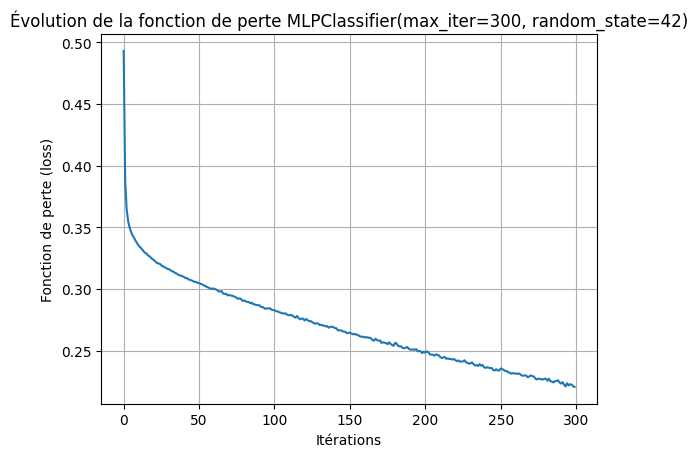

10
[['Modele', 'Recall', 'F1-Score', 'Accuracy', 'Precision'], ['lightgbm', '0.75', '0.74', '0.835', '0.731'], ['xgboost', '0.766', '0.759', '0.848', '0.754'], ['adaboost', '0.663', '0.654', '0.78', '0.645'], ['gradientboost', '0.758', '0.756', '0.847', '0.755'], ['histgboost', '0.759', '0.748', '0.84', '0.738'], ['randomForest', '0.71', '0.714', '0.822', '0.719'], ['logreg', '0.727', '0.731', '0.833', '0.735'], ['knn', '0.652', '0.675', '0.803', '0.7'], ['tree', '0.671', '0.649', '0.772', '0.627'], ['mlp', '0.705', '0.702', '0.812', '0.699']]


In [11]:
pipeline_model, predictions, recall,accuracy,f1score,precision,mse, r2, tab_modele, dict_modeles =training_machine_learning_models(modele_type,modeles,False, features_train_scaled,features_test_scaled,target_train,target_test)

print(tab_modele)

lightgbm


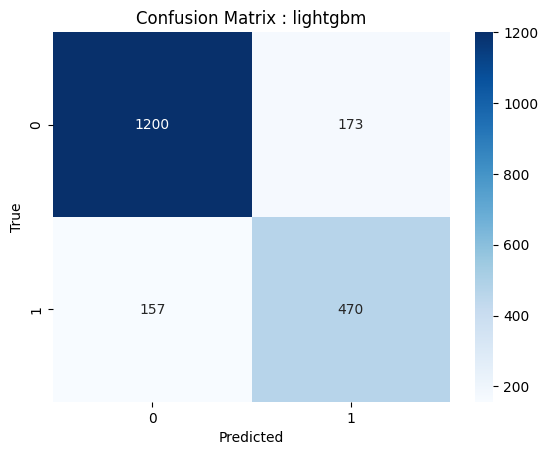

xgboost


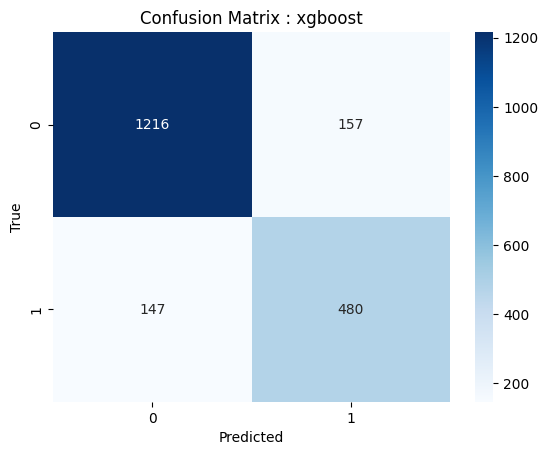

adaboost


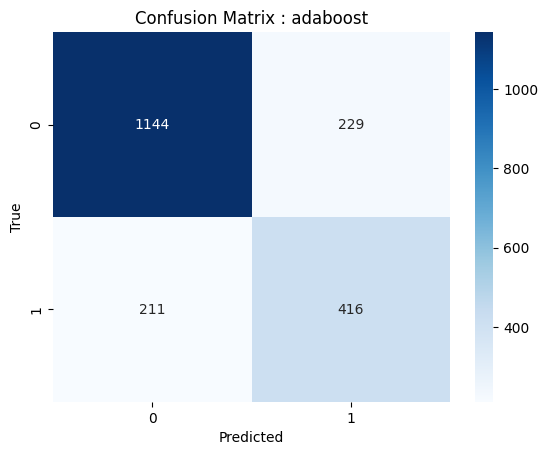

gradientboost


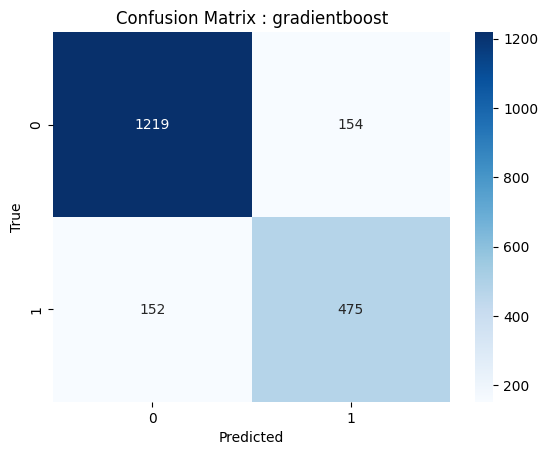

histgboost


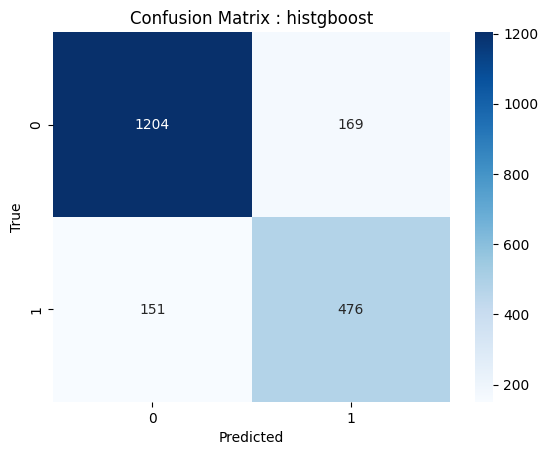

randomForest


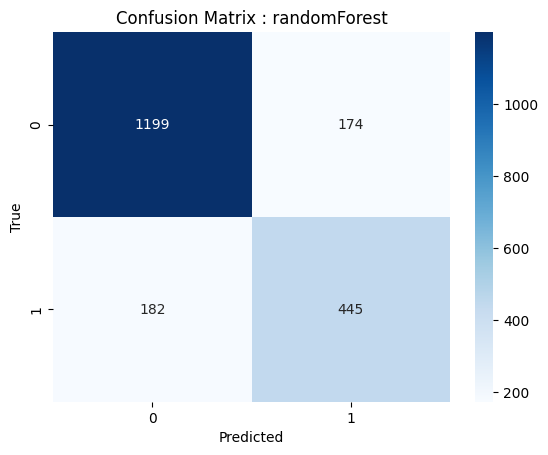

logreg


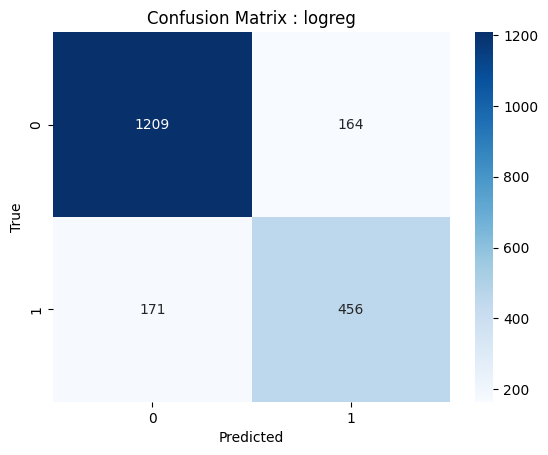

knn


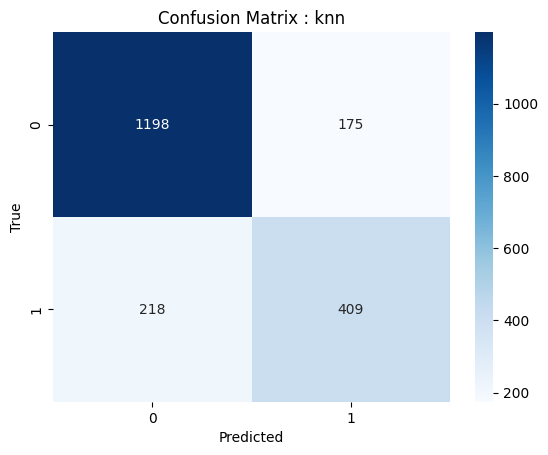

tree


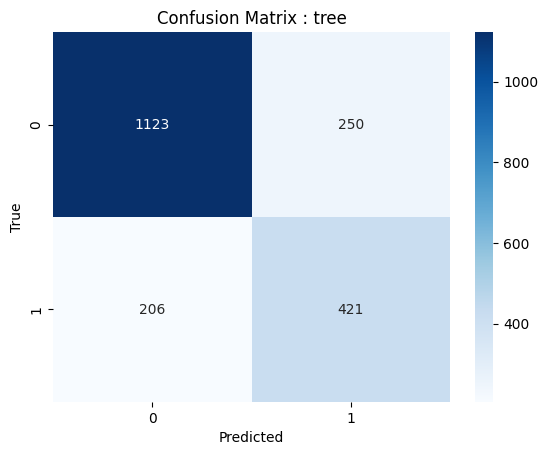

mlp


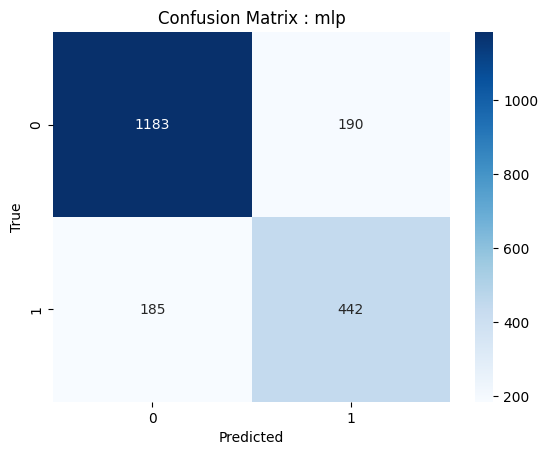

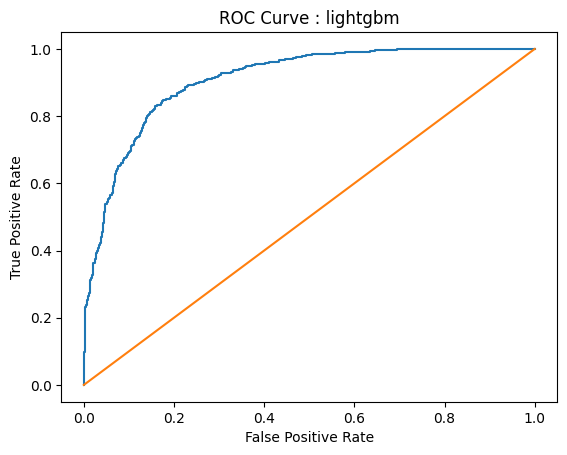

lightgbm


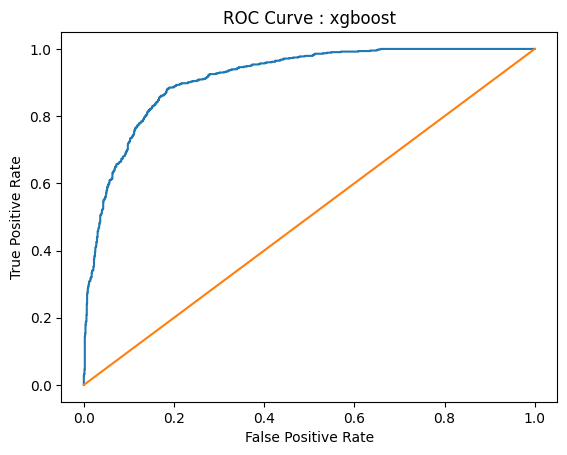

xgboost


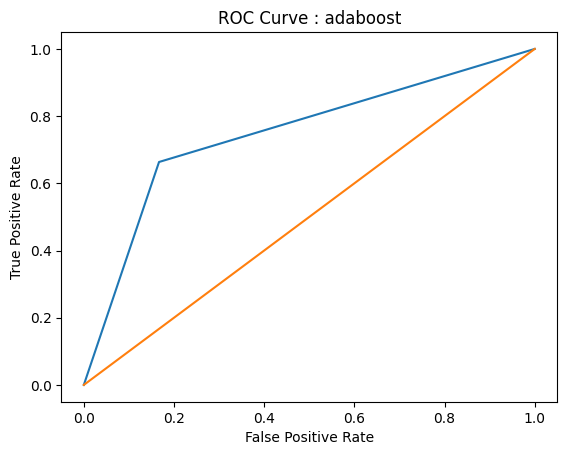

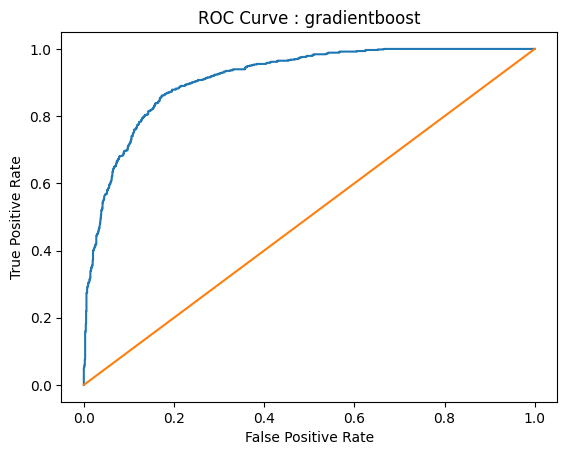

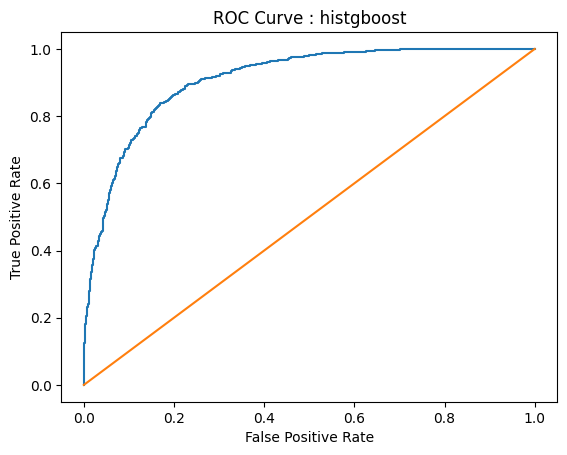

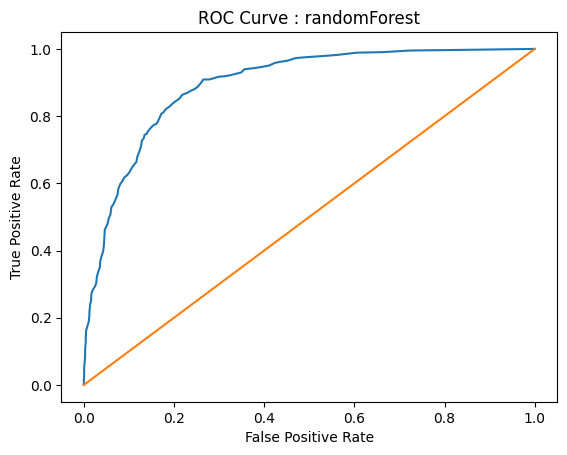

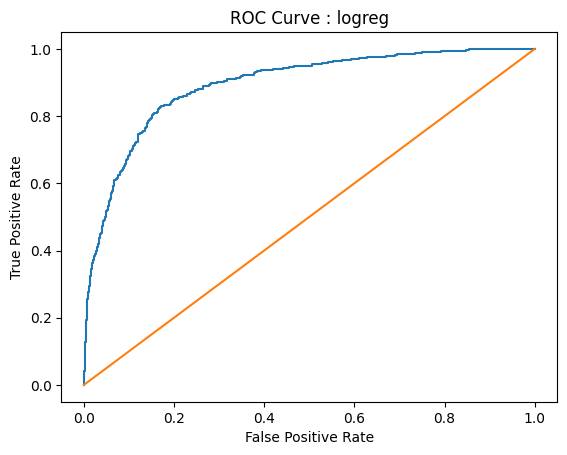

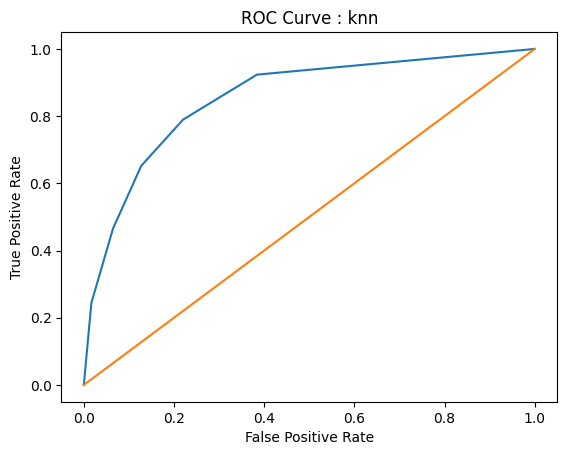

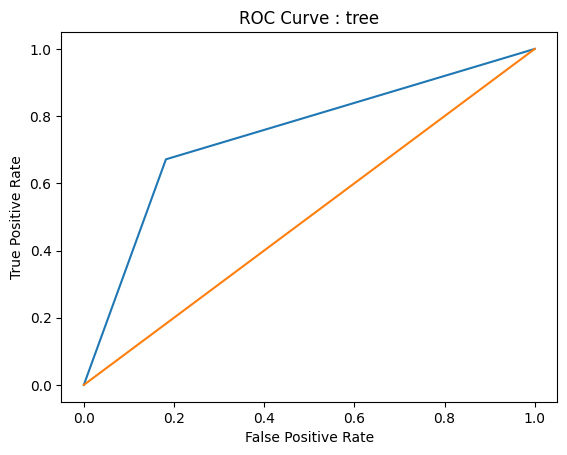

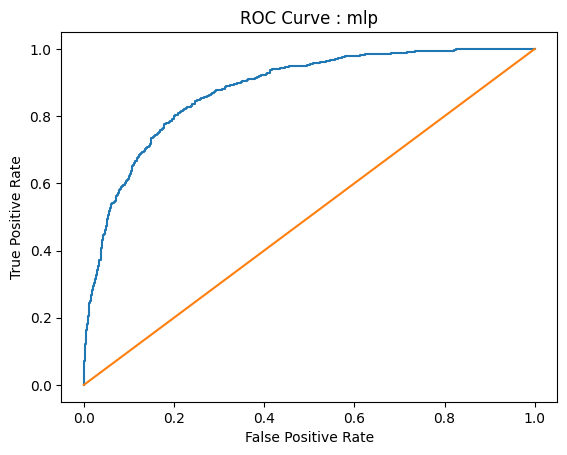

In [12]:
best_modele, pipeline_best_model, best = evaluation_of_trained_models(predictions , dict_modeles,pipeline_model, modele_type, target_test, recall,accuracy,f1score,precision,mse, r2, tab_modele, figure_path)

In [13]:
print(best)

xgboost


In [14]:
results = pd.DataFrame(tab_modele[1:], columns=tab_modele[0])
results["Precision"]=results["Precision"].astype("float64")
results["Accuracy"]=results["Accuracy"].astype("float64")
results["F1-Score"]=results["F1-Score"].astype("float64")
results["Recall"]=results["Recall"].astype("float64")
results = results.sort_values(by = "Precision", ascending=False)

In [15]:
results.head()

,Modele,Recall,F1-Score,Accuracy,Precision
3,gradientboost,0.758,0.756,0.847,0.755
1,xgboost,0.766,0.759,0.848,0.754
4,histgboost,0.759,0.748,0.840,0.738
6,logreg,0.727,0.731,0.833,0.735
0,lightgbm,0.750,0.740,0.835,0.731


In [16]:
report.doc_add_table(results)

In [17]:
print(config.get_report_path())

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Reports/


In [18]:
pipeline = build_the_final_pipeline(pipeline_best_model,raw_features,raw_targets,cible)

In [19]:
saving_of_best_model_for_production(model_path,model_api_path,pipeline,best)

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/xgboost_pipeline_model.joblib
C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/xgboost_pipeline_model.joblib


In [20]:
generate_data_contract_for_frontEnd(raw_features,features_path)

{'id': 'int64  : values = [ 101 to 999976 ]', 'age': 'int64  : values = [ 0 to 3 ]', 'gender': 'int64  : values = [ 0 to 1 ]', 'driving_experience': "category  : values = ['0-9y', '10-19y', '20-29y', '30y+']", 'education': "category  : values = ['high school', 'none', 'university']", 'income': "category  : values = ['upper class', 'poverty', 'working class', 'middle class']", 'credit_score': 'float64  : values = [ 0.0533575454627435 to 0.9608188278116948 ]', 'vehicle_ownership': 'float64  : values = [ 0.0 to 1.0 ]', 'vehicle_year': "category  : values = ['after 2015', 'before 2015']", 'married': 'float64  : values = [ 0.0 to 1.0 ]', 'children': 'float64  : values = [ 0.0 to 1.0 ]', 'postal_code': 'int64  : values = [ 10238 to 92101 ]', 'annual_mileage': 'float64  : values = [ 2000.0 to 22000.0 ]', 'vehicle_type': "category  : values = ['sedan', 'sports car']", 'speeding_violations': 'int64  : values = [ 0 to 22 ]', 'duis': 'int64  : values = [ 0 to 6 ]', 'past_accidents': 'int64  : val

In [21]:
report.report_builder(config.get_report_path())